<a href="https://colab.research.google.com/github/jinyoungkim0214/pytorch-cifar10/blob/main/PyTorch_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch를 이용해서 CIFAR 10 이미지 분류 해보기

# 딥러닝 모델을 학습시키기 위해 준비되어야 할 4가지 요소

1. 데이터
2. 모델
3. Loss function (손실함수, 목적함수, objective function 등으로 불려요): 정답과 모델의 예측값을 어떤 식으로 비교할지 결정해주는 함수
4. Optimizer: gradient descent를 해줄 애. 즉, 모델의 파라미터를 어느 방향으로 조금 수정할지 결정하고 수정해주는 함수

In [ ]:
%matplotlib inline

import torch
import torchvision
import torchvision.transforms as transforms #흑백이 아니라 rgb 이미지이다 (CIFAR10)

## 모델에 데이터 넣을 준비하기

우선 사용하고 싶은 데이터 파일이 있다면 그걸 우선 numpy array 형식으로 불러와야 해요<br/>
그리고는 필요한 전처리를 해준 후에 이 numpy array를 `torch.*Tensor` 형식으로 변환하고 <br/>
dataloader에 넣어주면 pytorch로 짠 딥러닝 모델에 넣을 준비가 된 것입니다.<br/>

대개 이제 이런 데이터 처리를 도와주는 패키지들이 있는데<br/>
이미지는 openCV, Pillow를 많이 쓰고,<br/>
텍스트에는 SpaCy를 많이 사용해요. <br/>

그런데 pytorch에서 고맙게도 그 데이터를 불러오고 전처리를 하는 걸<br/>
파이토치와 매끄럽게 잘 이어지도록 도와주는 패키지를 만들었놨어요.<br/>
* [torchvision](https://pytorch.org/docs/stable/torchvision/index.html#)
* [torchtext](https://torchtext.readthedocs.io/en/latest/)

몇몇 대표 데이터셋들은 해당 패키지에 이미 들어있어서<br/>
그냥 가져다 불러와서 쓰고 몇몇 처리만 해주면 사용할 준비가 끝나요!

이번에는 CIFAR 10이라는 데이터셋을 사용합니다.<br/>
이는 대표적인 데이터셋 중 하나라서 기억해두시면 이따금씩 보일 거예요.<br/>
클래스가 10개라서 CIFAR 10입니다.<br/>

들어있는 클래스는<br/>
‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’ 입니다.<br/>
size는 3x32x32이고 앞의 3은 RGB여서 그런 거예요.<br/>

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# 이미지는 RGB  3가지의 채널로 이루어져있으므로, 각 채널에 대한 mean, std를 넣어줘서 normalize해줘야 해요
# 이미지 데이터의 값이 0~1 사이였는데 이를 통해 -1 ~ +1 사이로 변환해줍니다.

batchsize = 16

# 너무나 간단합니다. torchvision에 이미 다 알아서 처리가 되어있어서 이렇게 편하게 불러올 수 있는 거예요!
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batchsize,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=batchsize,
                                         shuffle=False, num_workers=2)

# 이런 클래스들이 데이터셋 안에 있습니다.
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170M/170M [00:03<00:00, 43.4MB/s]


## 학습 이미지 예시 보기

32x32짜리 이미지라서 화질이 안 좋은 건 자연스러운 일입니다... <br/>
놀랍게도 이런 이미지들로 학습을 합니다.

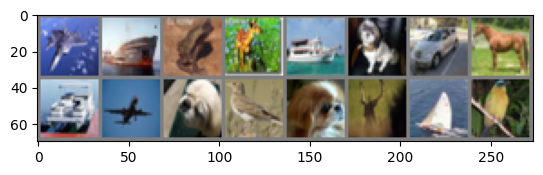

정답:plane  		  ship  		  frog  		  deer


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # 아까 앞에서 normalize해줘서 색깔 이미지가 이상해져있을 거기 때문에 보기 편하라고 다시 unnormalize해줍니다
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print( '정답:' + '  \t\t '.join('%5s' % classes[labels[j]] for j in range(4)))

## 모델 정의하기

앞선  notMNIST는 흑백 이미지라서 채널이 1개였지만 <br/>
여기서는 컬러 이미지라서 채널이 3개라는 거에 유의합니다.

In [ ]:
# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.conv1 = nn.Conv2d(3, 32, 3, stride=1, padding=2)
#         self.conv2 = nn.Conv2d(32, 64, 5, stride=1, padding=2)
#         self.pool = nn.MaxPool2d(2, 2)
#         self.relu = nn.ReLU()
#         ############### fc layer를 완성해보세요 ################
#         32
#         16
#         8




#         self.fc1 = nn.Linear(64 * 8 * 8, 10)

#         ########################################################

#     def forward(self, x):
#         x = self.pool(self.relu(self.conv1(x)))
#         x = self.pool(self.relu(self.conv2(x)))

#         ############### 빈칸을 완성 해보세요 ################
#         x = x.view(-1, 64 * 8 * 8)
#         # 그냥 예시: x가 만약 (16, 3, 12, 12) 모양이었다면 x.view(-1, 144)는 (48, 144) 모양으로 바꿔준답니다. -1은 나머지 숫자를 자동으로 채워주는 역할이에요

#         ########################################################
#         x = self.fc1(x)

#         return x

# net = Net()

import torch
import torch.nn as nn
from typing import Dict, List, Tuple, Union

class BasicBlock(nn.Module):
    expansion = 1
    def __init__(self, in_planes: int, out_planes: int, stride: int = 1, downsample: nn.Module = None,
                 padding_mode: str = 'constant'):
        super().__init__()
        self.conv1 = self._make_conv(in_planes, out_planes, kernel_size=3, stride=stride,
                                     padding=1, padding_mode=padding_mode)
        self.bn1 = nn.BatchNorm2d(out_planes)
        self.conv2 = self._make_conv(out_planes, out_planes, kernel_size=3, stride=1,
                                     padding=1, padding_mode=padding_mode)
        self.bn2 = nn.BatchNorm2d(out_planes)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

    def _make_conv(self, in_ch, out_ch, kernel_size, stride, padding, padding_mode):
        conv = nn.Conv2d(in_ch, out_ch, kernel_size=kernel_size, stride=stride,
                         padding=padding, bias=False)
        return conv

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        identity = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        if self.downsample is not None:
            identity = self.downsample(x)
        out += identity
        out = self.relu(out)
        return out

class Bottleneck(nn.Module): #conv여러개 -> bottleneck 한 덩어리 -> 여러개 -> Resnet
    expansion = 4
    def __init__(self, in_planes: int, out_planes: int, stride: int = 1, downsample: nn.Module = None,
                 padding_mode: str = 'constant'):
        super().__init__()
        mid_planes = out_planes
        self.conv1 = self._make_conv(in_planes, mid_planes, kernel_size=1, stride=1,
                                     padding=0, padding_mode=padding_mode)
        self.bn1 = nn.BatchNorm2d(mid_planes)
        self.conv2 = self._make_conv(mid_planes, mid_planes, kernel_size=3, stride=stride,
                                     padding=1, padding_mode=padding_mode)
        self.bn2 = nn.BatchNorm2d(mid_planes)
        self.conv3 = self._make_conv(mid_planes, out_planes * self.expansion, kernel_size=1, stride=1,
                                     padding=0, padding_mode=padding_mode)
        self.bn3 = nn.BatchNorm2d(out_planes * self.expansion)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

    def _make_conv(self, in_ch, out_ch, kernel_size, stride, padding, padding_mode):
        conv = nn.Conv2d(in_ch, out_ch, kernel_size=kernel_size, stride=stride,
                         padding=padding, bias=False)
        return conv

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        identity = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)
        out = self.conv3(out)
        out = self.bn3(out)
        if self.downsample is not None:
            identity = self.downsample(x)
        out += identity
        out = self.relu(out)
        return out

resnet_cfgs: Dict[str, Tuple[Union[BasicBlock, Bottleneck], List[int]]] = {
    "resnet18":  (BasicBlock,  [2, 2, 2, 2]), #bottleneck보다 가벼운게 basicblock
    "resnet34":  (BasicBlock,  [3, 4, 6, 3]),
    "resnet50":  (Bottleneck, [3, 4, 6, 3]), #여기서는 34로 돌림
}

def make_resnet_layers(
    resnet_type: str = "resnet18",
    in_channels: int = 1,
    padding_mode: str = "constant"
) -> nn.Module:
    """
    Modified to return a module that can output intermediate layers.
    """
    block_class, layer_cfg = resnet_cfgs[resnet_type]

    class ResNetLayers(nn.Module):
        def __init__(self):
            super().__init__()
            # Initial conv7x7 + BN + ReLU + MaxPool
            self.conv1 = nn.Conv2d(in_channels, 64, kernel_size=7, stride=2, padding=3, bias=False)
            self.bn1 = nn.BatchNorm2d(64)
            self.relu = nn.ReLU(inplace=True)
            self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

            # Define layers
            self.layer1 = self._make_layer(block_class, 64, 64, layer_cfg[0], stride=1, padding_mode=padding_mode)
            self.layer2 = self._make_layer(block_class, 64 * block_class.expansion, 128, layer_cfg[1], stride=2, padding_mode=padding_mode)
            self.layer3 = self._make_layer(block_class, 128 * block_class.expansion, 256, layer_cfg[2], stride=2, padding_mode=padding_mode)
            self.layer4 = self._make_layer(block_class, 256 * block_class.expansion, 512, layer_cfg[3], stride=2, padding_mode=padding_mode)

        def _make_layer(self, block, in_ch, out_ch, num_blocks, stride, padding_mode):
            downsample = None
            if stride != 1 or in_ch != out_ch * block.expansion:
                downsample = nn.Sequential(
                    nn.Conv2d(in_ch, out_ch * block.expansion, kernel_size=1, stride=stride, bias=False),
                    nn.BatchNorm2d(out_ch * block.expansion),
                )
            blocks = []
            blocks.append(block(in_ch, out_ch, stride=stride, downsample=downsample, padding_mode=padding_mode))
            in_ch = out_ch * block.expansion
            for _ in range(1, num_blocks):
                blocks.append(block(in_ch, out_ch, stride=1, downsample=None, padding_mode=padding_mode))
            return nn.Sequential(*blocks)

        def forward(self, x):
            x = self.conv1(x)
            x = self.bn1(x)
            x = self.relu(x)
            x = self.maxpool(x)
            out1 = self.layer1(x)
            out2 = self.layer2(out1)
            out3 = self.layer3(out2)
            out4 = self.layer4(out3)
            return out4

    return ResNetLayers()

class ResNetFeatureExtractor(nn.Module):
    """
    Modified to return outputs from layer1, layer2, layer3, and layer4.
    Example:
        model = ResNetFeatureExtractor(resnet_type='resnet18', in_channels=1)
        outs = model(x)  # x: (B,1,192,96), outs: list of [B,64,96,48], [B,128,48,24], [B,256,24,12], [B,512,12,6]
    """
    def __init__(
        self,
        resnet_type: str = "resnet18",
        in_channels: int = 3,
        padding_mode: str = 'constant'
    ):
        super().__init__()
        assert resnet_type in resnet_cfgs, f"Unsupported ResNet type: {resnet_type}"

        self.resnet_type = resnet_type
        self.in_channels = in_channels
        self.padding_mode = padding_mode
        self.feature_extractor = make_resnet_layers(resnet_type, in_channels, padding_mode)
        self._initialize_weights()

    def forward(self, x: torch.Tensor) -> List[torch.Tensor]:
        return self.feature_extractor(x)

    def _initialize_weights(self) -> None:
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)




In [ ]:
class BaselineModel1(nn.Module):
    def __init__(self):
        super().__init__()
        self.fe = ResNetFeatureExtractor(resnet_type="resnet34", in_channels=3) #resnetfeatureextractor: backbone부분
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, 10)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.fe(x)
        #여기서부터 head
        x = self.avgpool(x)
        print('avgpool shape:', x.shape)
        x = torch.flatten(x, 1)
        print('flatten shape:', x.shape)
        x = self.fc(x)
        print('fc shape:', x.shape)

        return x

net=BaselineModel1()

## Loss function과 Optimizer 정의하기

Cross-entropy loss function과 SGD optimizer를 씁니다.


In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.005, momentum=0.9)  # Learning rate: 학습률. 한 번의 optimizer step에서 얼마나 멀리 갈지.

## 모델 학습시키기

이제
* data loader
* model
* loss function
* optimizer

이 4가지가 모두 준비되었으니 학습을 할 준비가 끝났습니다.

```
종료 조건 만족할 때까지 아래를 반복:
    1. 우리의 data loader로부터 데이터를 받아와서 모델에 넣어주고
    2. 모델의 출력 값을 받아서
    3. loss function 값을 계산하고
    4. 그 loss를 바탕으로 backprop(=gradient를 계산) 해준 뒤
    5. optimizer가 gradient descent를 1 step 진행합니다.
    ```

### 근데...

학습을 하면서 테스트셋 성적이 어떻게 변하는지를 보는 건 어때요?

In [ ]:
training_loss_history = []
test_loss_history = []

In [ ]:
for epoch in range(2):  # 전체 데이터셋을 몇 번 반복할 건지

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # trainloader로부터 데이터와 라벨을 받아옵니다.
        inputs, labels = data

        # 매 반복마다 이전 gradient를 한 번 지워줍니다.
        optimizer.zero_grad()

        # 모델에 데이터 넣어서 forward 해주고
        # backprop으로 이번 input에 대해 gradient를 계산해주고
        # optimizer가 gradient descent 1스텝 진행
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 결과치 화면에 뿌려주기
        running_loss += loss.item()
        if i % 200 == 199:    # 200 미니배치마다 출력 i=0~199: 200개가 통과; 200개마다 프린트해서 보자 #역전파하고 있으니까 학습데이터에 대한 loss는 계속 줄어듦
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))

            # 나중에 시각화를 위해 중간중간 따로 loss값 저장
            training_loss_history.append(running_loss / 200)

            with torch.no_grad():
                running_test_loss = 0.0
                for i, test_data in enumerate(testloader, 0):
                    test_images, test_labels = test_data
                    test_outputs = net(test_images)
                    test_loss = criterion(test_outputs, test_labels)
                    running_test_loss += test_loss.item()

                test_loss_history.append(running_test_loss / i)

            running_loss = 0.0

print('학습 끝!')

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
flatten shape: torch.Size([16, 512])
fc shape: torch.Size([16, 10])
avgpool shape: torch.Size([16, 512, 1, 1])
flatten shape: torch.Size([16, 512])
fc shape: torch.Size([16, 10])
avgpool shape: torch.Size([16, 512, 1, 1])
flatten shape: torch.Size([16, 512])
fc shape: torch.Size([16, 10])
avgpool shape: torch.Size([16, 512, 1, 1])
flatten shape: torch.Size([16, 512])
fc shape: torch.Size([16, 10])
avgpool shape: torch.Size([16, 512, 1, 1])
flatten shape: torch.Size([16, 512])
fc shape: torch.Size([16, 10])
avgpool shape: torch.Size([16, 512, 1, 1])
flatten shape: torch.Size([16, 512])
fc shape: torch.Size([16, 10])
avgpool shape: torch.Size([16, 512, 1, 1])
flatten shape: torch.Size([16, 512])
fc shape: torch.Size([16, 10])
avgpool shape: torch.Size([16, 512, 1, 1])
flatten shape: torch.Size([16, 512])
fc shape: torch.Size([16, 10])
avgpool shape: torch.Size([16, 512, 1, 1])
flatten shape: torch.Size([16, 512])
fc shape: torch.Size([16, 10])
avgpool 

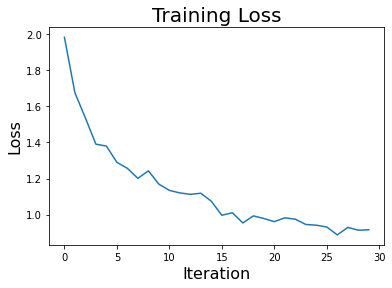

In [ ]:
plt.plot(training_loss_history)
plt.title('Training Loss', fontsize=20)  # 여기에 한글을 넣고 싶으시다구요? 그럼 좀 귀찮은 몇 가지 작업들을 해야 합니다... 그러므로 패스
plt.xlabel('Iteration',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.show()

[그래도 난 matplotlib에 한글을 넣겠어!](https://programmers.co.kr/learn/courses/21/lessons/950)

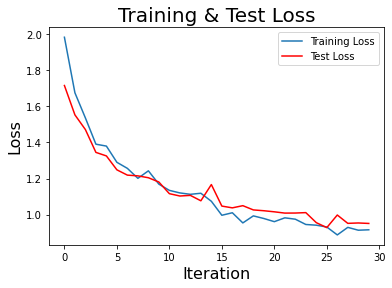

In [ ]:
plt.plot(training_loss_history, label="Training Loss")
plt.plot(test_loss_history, 'r', label="Test Loss")
plt.title('Training & Test Loss', fontsize=20)
plt.xlabel('Iteration',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.show()

## 모델 저장하기

학습이 끝난 모델의 파라미터를 저장해두면 나중에 필요할 때 불러와서 가져다 쓰면 바로 사용할 수 있어요.

In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

## 테스트셋에 검증해보기

이제 모델 학습이 끝났으니 테스트 데이터에도 잘하는지 확인을 해봐야 합니다. <br/>
테스트셋 데이터 중 몇 개나 맞히는지 알아볼까요?

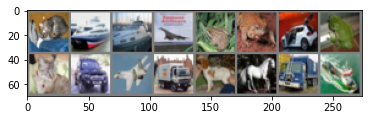

In [ ]:
# 테스트셋 이미지 예시도 심심풀이로 한 번 확인해보기
testloader = torch.utils.data.DataLoader(testset, batch_size=batchsize,
                                         shuffle=False, num_workers=2)
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

### 아까 저장해뒀던 모델 파라미터 불러오기

사실 굳이 불러오지 않고 그냥 위에 있는 `net` 그대로 써도 되지만 <br/>
일단 어떻게 저장하고 불러오는지 여러분이 알아둬야 하니까 여기서는 `net`에 굳이 다시 불러와봤어요

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

이미지들을 넣었을 때 모델이 뭐라고 예측하는지 한 번 확인해볼게요.

In [ ]:
outputs = net(images)
outputs

tensor([[-1.8887, -0.5288, -1.9959,  4.5257, -0.7981,  2.3362,  2.7139, -3.4796,
          0.5907, -1.0861],
        [ 2.3277, 10.5833, -2.7634, -3.8223, -4.9383, -5.9333, -3.7761, -4.1475,
          9.2267,  3.6063],
        [ 1.3134,  3.1188, -0.2507, -1.2918, -0.4799, -1.9781, -2.3330, -0.4828,
          2.6096,  0.1605],
        [ 4.1357,  2.0648,  0.1793, -1.0982,  0.8719, -3.2622, -2.1181, -2.0283,
          3.4853, -1.5190],
        [-6.2102, -1.8327,  1.5900,  5.2551,  4.5033, -0.8085,  7.0202, -3.6900,
         -2.7820, -3.1727],
        [-3.3507, -1.7618,  0.1294,  2.4971,  0.4107,  1.7871,  4.4213, -0.2017,
         -3.4866, -0.9255],
        [ 0.5641,  4.7005, -3.6244,  2.7552, -3.5886,  1.1531,  2.3835, -2.6820,
         -3.1645,  1.4515],
        [-0.3546, -5.1323,  1.9683,  2.0455,  4.0742, -0.4576,  4.6769, -0.0390,
         -3.0483, -4.1039],
        [-2.9527, -5.1487,  1.0808,  5.8693,  3.7610,  2.6946,  1.4792,  0.9072,
         -3.9279, -4.1057],
        [ 1.1680,  

뭔지 전혀 모르겠죠? <br/>
각 row에 있는 숫자들은 10개의 클래스에 대한 logit 값이에요. (확률 값이 아니라) <br/>
어떤 인덱스의 logit값이 크면 모델은 그 해당 인덱스의 클래스로 해당 이미지를 분류한다는 의미입니다. <br/>
따라서 그냥 이 logit 값들 중 제일 큰 logit이 있는 index를 각 row마다 뽑아오면 됩니다. <br/>

In [ ]:
_, predicted = torch.max(outputs, 1)  # 1번째 차원(=각 row)에서 각각 max인 값과 해당 index를 뽑아옵니다.

print('모델 예측: ', ', '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

모델 예측:    cat,   car,   car, plane


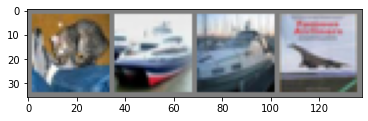

실제 정답:    cat,  ship,  ship, plane
모델 예측:    cat,   car,   car, plane


In [ ]:
# 원래 이미지랑 같이 볼까요?
imshow(torchvision.utils.make_grid(images[:4]))
print('실제 정답: ', ', '.join('%5s' % classes[labels[j]] for j in range(4)))
print('모델 예측: ', ', '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

나름 잘 맞히는 거 같습니다. <br/>
그러면 이제 전체 테스트셋에 대해 정답과 비교해서 몇 개나 맞히는지 보겠습니다.

### 테스트셋 정답률 확인해보기

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('10000개의 테스트 이미지에 대한 정답률: %d %%' % (
    100 * correct / total))

10000개의 테스트 이미지에 대한 정답률: 67 %


### 각 클래스 별 정답률 확인해보기

In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():  # 매우매우 중요! 테스트셋으로 학습하는 건 반칙입니다. 테스트셋으로 backprop을 하면 안 되지요.
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('%5s 클래스의 정답률 : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

plane 클래스의 정답률 : 66 %
  car 클래스의 정답률 : 81 %
 bird 클래스의 정답률 : 34 %
  cat 클래스의 정답률 : 62 %
 deer 클래스의 정답률 : 64 %
  dog 클래스의 정답률 : 56 %
 frog 클래스의 정답률 : 78 %
horse 클래스의 정답률 : 68 %
 ship 클래스의 정답률 : 75 %
truck 클래스의 정답률 : 82 %


# 과제:

### 1.ipynb 파일 제출 (10점)
convolution layer **2층** 이상의 convnet을 만들어서 <br/>
테스트 데이터에 대한 정답률을 높여서 ipynb 파일을 제출을 하시면 됩니다! <br/>
모델을 정의하고 이것저것 바꿔보세요. <br/>
**55%**를 넘겨보도록 해보세요!

- 55%를 넘기시면 8점
- 57.5%를 넘기시면 9점
- 60%를 넘기시면 10점

수업 시간에 말한 거 이외의 힌트:<br/>
`self.conv2`가 있어야겠죠 2층을 쌓으려면? <br/>
이건 weight기 때문에 따로 별도로 `self.conv2`가 있어야 하지만 relu나 maxpool은 파라미터가 없기 때문에 있는 거 그대로 쓰시면 되는 거예요! <br/>
과제에서 반드시 convolution layer를 2층 이상을 쌓으셔야 해요. 거기에 추가로 fc layer도 더 쌓으실 수도 있겠죠? <br/>

### 2.실험 결과 설명 제출 (5점)
Learning rate를 크게 해서 돌려보기도 하고 작게 해서 돌려보기도 하면서 각각의 training loss graph를 비교해보세요.<br/>
앞에서 한 것처럼 그래프를 그려보세요. 각 실험에 대한 graph가 노트북 파일 내에 남아있어야 해요. <br/>
그리고 그 성능에 차이가 나는 이유를 생각해서 써보세요.

## 주의사항
ipynb 파일의 이름은 `IAB2022F_[학번]_[이름].ipynb`로 제출해주세요. 예시: `IAB2022F_2022-12345_홍길동.ipynb`<br/>
제출시 ETL상에서 자동으로 파일명 끝에 번호가 붙는 경우는 그대로 두셔도 됩니다.

## 실험 결과 설명 작성하는 칸
convolution layer는 2층으로 구성하였으며, epoch을 증가시켰을 시 학습 시간이 오래 걸려서 2로 다시 설정하였다. lr=0.005으로 설정하였는데, 이 경우 67 %의 정확도를 얻을 수 있었다. 이 경우 적당한 파라미터 조정을 통해 학습이 잘 이루어졌다고 판단할 수 있었다.

case 1에서는, lr=0.1으로 lr=0.005 보다 learning rate을 증가시켰는데, training loss가 초기에 급격하게 감소하였는데 이후 진동하는 모습을 확인할 수 있다. 이 경우 오버피팅이 일어나 진동하는 것으로 생각할 수 있다.

case 2에서는, lr=0.0005으로 lr=0.005 보다 learning rate을 감소시켰는데, training loss의 수렴 속도가 감소하였다. 이 경우 learning rate이 작아 학습이 아직 완료되지 않았다고 생각할 수 있었다.

case 3에서는 lr=1으로 learning rate을 크게 증가시켰는데, training loss의 값이 크게 진동하는 모습을 확인하였다. 이 경우 오버피팅이 일어나 진동하는 것으로 생각할 수 있었다.

마찬가지로, case 4에서도 lr=0.00000001으로 learning rate 값을 크게 감소시키자 training loss가 수렴하지 못하고 진동하는 모습을 보였다. 이 경우 learning rate이 너무 작아 학습이 잘 이루어지지 않았다고 생각할 수 있었다.

[1,   200] loss: 2.368
[1,   400] loss: 2.318
[1,   600] loss: 2.319
[1,   800] loss: 2.315
[1,  1000] loss: 2.314
[1,  1200] loss: 2.318
[1,  1400] loss: 2.314
[1,  1600] loss: 2.318
[1,  1800] loss: 2.315
[1,  2000] loss: 2.321
[1,  2200] loss: 2.319
[1,  2400] loss: 2.314
[1,  2600] loss: 2.313
[1,  2800] loss: 2.317
[1,  3000] loss: 2.314
[2,   200] loss: 2.320
[2,   400] loss: 2.317
[2,   600] loss: 2.316
[2,   800] loss: 2.317
[2,  1000] loss: 2.319
[2,  1200] loss: 2.315
[2,  1400] loss: 2.317
[2,  1600] loss: 2.314
[2,  1800] loss: 2.317
[2,  2000] loss: 2.313
[2,  2200] loss: 2.323
[2,  2400] loss: 2.319
[2,  2600] loss: 2.316
[2,  2800] loss: 2.317
[2,  3000] loss: 2.316
학습 끝!


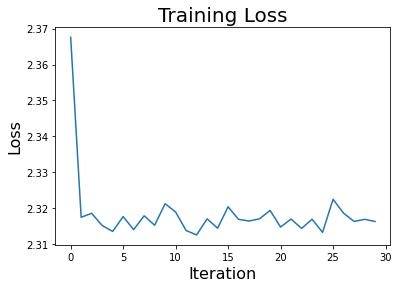

In [ ]:
##########   case 1: learning rate 키운 경우    ############

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9)  # Learning rate: 학습률. 한 번의 optimizer step에서 얼마나 멀리 갈지.
training_loss_history = []
test_loss_history = []

for epoch in range(2):  # 전체 데이터셋을 몇 번 반복할 건지

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # trainloader로부터 데이터와 라벨을 받아옵니다.
        inputs, labels = data

        # 매 반복마다 이전 gradient를 한 번 지워줍니다.
        optimizer.zero_grad()

        # 모델에 데이터 넣어서 forward 해주고
        # backprop으로 이번 input에 대해 gradient를 계산해주고
        # optimizer가 gradient descent 1스텝 진행
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 결과치 화면에 뿌려주기
        running_loss += loss.item()
        if i % 200 == 199:    # 2000 미니배치마다 출력
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))

            # 나중에 시각화를 위해 중간중간 따로 loss값 저장
            training_loss_history.append(running_loss / 200)

            with torch.no_grad():
                running_test_loss = 0.0
                for i, test_data in enumerate(testloader, 0):
                    test_images, test_labels = test_data
                    test_outputs = net(test_images)
                    test_loss = criterion(test_outputs, test_labels)
                    running_test_loss += test_loss.item()

                test_loss_history.append(running_test_loss / i)

            running_loss = 0.0

print('학습 끝!')

plt.plot(training_loss_history)
plt.title('Training Loss', fontsize=20)  # 여기에 한글을 넣고 싶으시다구요? 그럼 좀 귀찮은 몇 가지 작업들을 해야 합니다... 그러므로 패스
plt.xlabel('Iteration',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.show()

[1,   200] loss: 2.327
[1,   400] loss: 2.327
[1,   600] loss: 2.319
[1,   800] loss: 2.314
[1,  1000] loss: 2.308
[1,  1200] loss: 2.312
[1,  1400] loss: 2.307
[1,  1600] loss: 2.308
[1,  1800] loss: 2.308
[1,  2000] loss: 2.308
[1,  2200] loss: 2.306
[1,  2400] loss: 2.304
[1,  2600] loss: 2.307
[1,  2800] loss: 2.304
[1,  3000] loss: 2.305
[2,   200] loss: 2.304
[2,   400] loss: 2.303
[2,   600] loss: 2.304
[2,   800] loss: 2.304
[2,  1000] loss: 2.303
[2,  1200] loss: 2.304
[2,  1400] loss: 2.303
[2,  1600] loss: 2.302
[2,  1800] loss: 2.303
[2,  2000] loss: 2.302
[2,  2200] loss: 2.303
[2,  2400] loss: 2.303
[2,  2600] loss: 2.303
[2,  2800] loss: 2.303
[2,  3000] loss: 2.302
학습 끝!


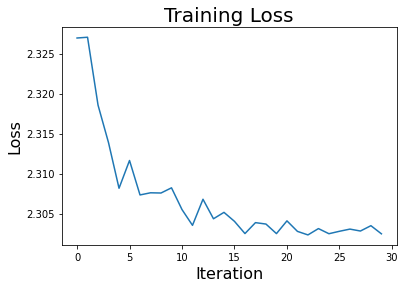

In [ ]:
##########   case 2: learning rate 줄인 경우    ############

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.0005, momentum=0.9)  # Learning rate: 학습률. 한 번의 optimizer step에서 얼마나 멀리 갈지.
training_loss_history = []
test_loss_history = []

for epoch in range(2):  # 전체 데이터셋을 몇 번 반복할 건지

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # trainloader로부터 데이터와 라벨을 받아옵니다.
        inputs, labels = data

        # 매 반복마다 이전 gradient를 한 번 지워줍니다.
        optimizer.zero_grad()

        # 모델에 데이터 넣어서 forward 해주고
        # backprop으로 이번 input에 대해 gradient를 계산해주고
        # optimizer가 gradient descent 1스텝 진행
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 결과치 화면에 뿌려주기
        running_loss += loss.item()
        if i % 200 == 199:    # 2000 미니배치마다 출력
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))

            # 나중에 시각화를 위해 중간중간 따로 loss값 저장
            training_loss_history.append(running_loss / 200)

            with torch.no_grad():
                running_test_loss = 0.0
                for i, test_data in enumerate(testloader, 0):
                    test_images, test_labels = test_data
                    test_outputs = net(test_images)
                    test_loss = criterion(test_outputs, test_labels)
                    running_test_loss += test_loss.item()

                test_loss_history.append(running_test_loss / i)

            running_loss = 0.0

print('학습 끝!')

plt.plot(training_loss_history)
plt.title('Training Loss', fontsize=20)  # 여기에 한글을 넣고 싶으시다구요? 그럼 좀 귀찮은 몇 가지 작업들을 해야 합니다... 그러므로 패스
plt.xlabel('Iteration',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.show()

[1,   200] loss: 2.440
[1,   400] loss: 2.449
[1,   600] loss: 2.462
[1,   800] loss: 2.494
[1,  1000] loss: 2.450
[1,  1200] loss: 2.468
[1,  1400] loss: 2.459
[1,  1600] loss: 2.449
[1,  1800] loss: 2.452
[1,  2000] loss: 2.439
[1,  2200] loss: 2.434
[1,  2400] loss: 2.451
[1,  2600] loss: 2.424
[1,  2800] loss: 2.456
[1,  3000] loss: 2.434
[2,   200] loss: 2.473
[2,   400] loss: 2.472
[2,   600] loss: 2.467
[2,   800] loss: 2.441
[2,  1000] loss: 2.451
[2,  1200] loss: 2.432
[2,  1400] loss: 2.444
[2,  1600] loss: 2.464
[2,  1800] loss: 2.453
[2,  2000] loss: 2.448
[2,  2200] loss: 2.482
[2,  2400] loss: 2.445
[2,  2600] loss: 2.466
[2,  2800] loss: 2.451
[2,  3000] loss: 2.455
학습 끝!


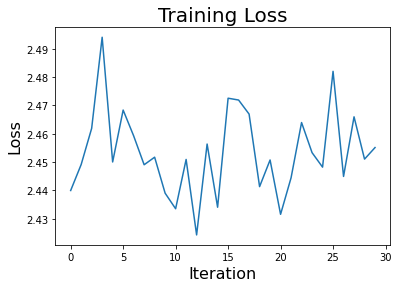

In [ ]:
##########  case 3: learning rate을 많이 키운 경우    ############

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=1, momentum=0.9)  # Learning rate: 학습률. 한 번의 optimizer step에서 얼마나 멀리 갈지.
training_loss_history = []
test_loss_history = []

for epoch in range(2):  # 전체 데이터셋을 몇 번 반복할 건지

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # trainloader로부터 데이터와 라벨을 받아옵니다.
        inputs, labels = data

        # 매 반복마다 이전 gradient를 한 번 지워줍니다.
        optimizer.zero_grad()

        # 모델에 데이터 넣어서 forward 해주고
        # backprop으로 이번 input에 대해 gradient를 계산해주고
        # optimizer가 gradient descent 1스텝 진행
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 결과치 화면에 뿌려주기
        running_loss += loss.item()
        if i % 200 == 199:    # 2000 미니배치마다 출력
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))

            # 나중에 시각화를 위해 중간중간 따로 loss값 저장
            training_loss_history.append(running_loss / 200)

            with torch.no_grad():
                running_test_loss = 0.0
                for i, test_data in enumerate(testloader, 0):
                    test_images, test_labels = test_data
                    test_outputs = net(test_images)
                    test_loss = criterion(test_outputs, test_labels)
                    running_test_loss += test_loss.item()

                test_loss_history.append(running_test_loss / i)

            running_loss = 0.0

print('학습 끝!')

plt.plot(training_loss_history)
plt.title('Training Loss', fontsize=20)  # 여기에 한글을 넣고 싶으시다구요? 그럼 좀 귀찮은 몇 가지 작업들을 해야 합니다... 그러므로 패스
plt.xlabel('Iteration',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.show()

[1,   200] loss: 2.428
[1,   400] loss: 2.424
[1,   600] loss: 2.406
[1,   800] loss: 2.440
[1,  1000] loss: 2.407
[1,  1200] loss: 2.417
[1,  1400] loss: 2.421
[1,  1600] loss: 2.424
[1,  1800] loss: 2.422
[1,  2000] loss: 2.429
[1,  2200] loss: 2.416
[1,  2400] loss: 2.413
[1,  2600] loss: 2.426
[1,  2800] loss: 2.419
[1,  3000] loss: 2.433
[2,   200] loss: 2.434
[2,   400] loss: 2.415
[2,   600] loss: 2.428
[2,   800] loss: 2.397
[2,  1000] loss: 2.423
[2,  1200] loss: 2.429
[2,  1400] loss: 2.422
[2,  1600] loss: 2.424
[2,  1800] loss: 2.413
[2,  2000] loss: 2.430
[2,  2200] loss: 2.411
[2,  2400] loss: 2.407
[2,  2600] loss: 2.425
[2,  2800] loss: 2.418
[2,  3000] loss: 2.420
학습 끝!


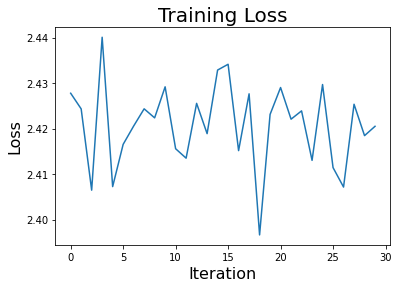

In [ ]:
##########  case 4: learning rate을 많이 줄인 경우    ############

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.00000001, momentum=0.9)  # Learning rate: 학습률. 한 번의 optimizer step에서 얼마나 멀리 갈지.
training_loss_history = []
test_loss_history = []

for epoch in range(2):  # 전체 데이터셋을 몇 번 반복할 건지

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # trainloader로부터 데이터와 라벨을 받아옵니다.
        inputs, labels = data

        # 매 반복마다 이전 gradient를 한 번 지워줍니다.
        optimizer.zero_grad()

        # 모델에 데이터 넣어서 forward 해주고
        # backprop으로 이번 input에 대해 gradient를 계산해주고
        # optimizer가 gradient descent 1스텝 진행
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 결과치 화면에 뿌려주기
        running_loss += loss.item()
        if i % 200 == 199:    # 2000 미니배치마다 출력
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))

            # 나중에 시각화를 위해 중간중간 따로 loss값 저장
            training_loss_history.append(running_loss / 200)

            with torch.no_grad():
                running_test_loss = 0.0
                for i, test_data in enumerate(testloader, 0):
                    test_images, test_labels = test_data
                    test_outputs = net(test_images)
                    test_loss = criterion(test_outputs, test_labels)
                    running_test_loss += test_loss.item()

                test_loss_history.append(running_test_loss / i)

            running_loss = 0.0

print('학습 끝!')

plt.plot(training_loss_history)
plt.title('Training Loss', fontsize=20)  # 여기에 한글을 넣고 싶으시다구요? 그럼 좀 귀찮은 몇 가지 작업들을 해야 합니다... 그러므로 패스
plt.xlabel('Iteration',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.show()

## [덧] GPU 위에서 학습하기

지금까지는 cpu위에서 다 계산을 한 거예요.<br/>
GPU 위에서 저희 모델이 인풋 데이터를 받아서 출력을 계산하고 싶잖아요? <br/>
그러면 해야 할 일은<br/>
모델도 gpu에 보내고, 데이터도 gpu에 보내는 일입니다.<br/>

그러기 위해선 일단 gpu가 사용 가능한지부터 봐야겠죠?<br/>
CUDA available:



In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# CUDA가 있는 컴퓨터라면 CUDA 라고 뜨고 아니면 cpu라고 뜰 겁니다
print(device)

cpu


** 참고로, CoLab에서 실험하는 경우에는, [보기]-[런타임]-[런타임 유형 변경]에서 [하드웨어 가속기]를 [GPU]로 변경하면 GPU를 사용할 수 있어요!

The rest of this section assumes that ``device`` is a CUDA device.

Then these methods will recursively go over all modules and convert their
parameters and buffers to CUDA tensors:

아래처럼 수정을 해주면 모델이 gpu 위에 올라갑니다

```python
net = net.to(device)
```

데이터도 올려줘야겠죠?

```python
inputs, labels = data[0].to(device), data[1].to(device)
 ```
```python
test_images, test_labels = test_data[0].to(device), test_data[1].to(device)
```

지금은 모델이 너무 작아서 gpu에서 하든 cpu에서 하든 속도 차이가 별로 없습니다.